# Classification

In [61]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Impor dataset
dataset = pd.read_csv('dataset.csv')
datasetc = pd.read_csv('dataset.csv')


In [62]:
columns_to_drop = ['user-id', 'user-gender', 'user-nationality', 'user-knowledge', 'user-loyalty', 'user-loan',
                   'user-riskAversion', 'user-marital', 'product-type', 'product-risk', 'transaction-id', 'product-yield']

datasetc.drop(columns=columns_to_drop, inplace=True)
datasetc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user-age         304 non-null    int64  
 1   user-income      304 non-null    int64  
 2   user-savings     304 non-null    int64  
 3   user-properties  304 non-null    int64  
 4   user-dependents  304 non-null    int64  
 5   user-pension     304 non-null    int64  
 6   product-term     304 non-null    int64  
 7   year             304 non-null    int64  
 8   month            304 non-null    int64  
 9   score            304 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 23.9 KB


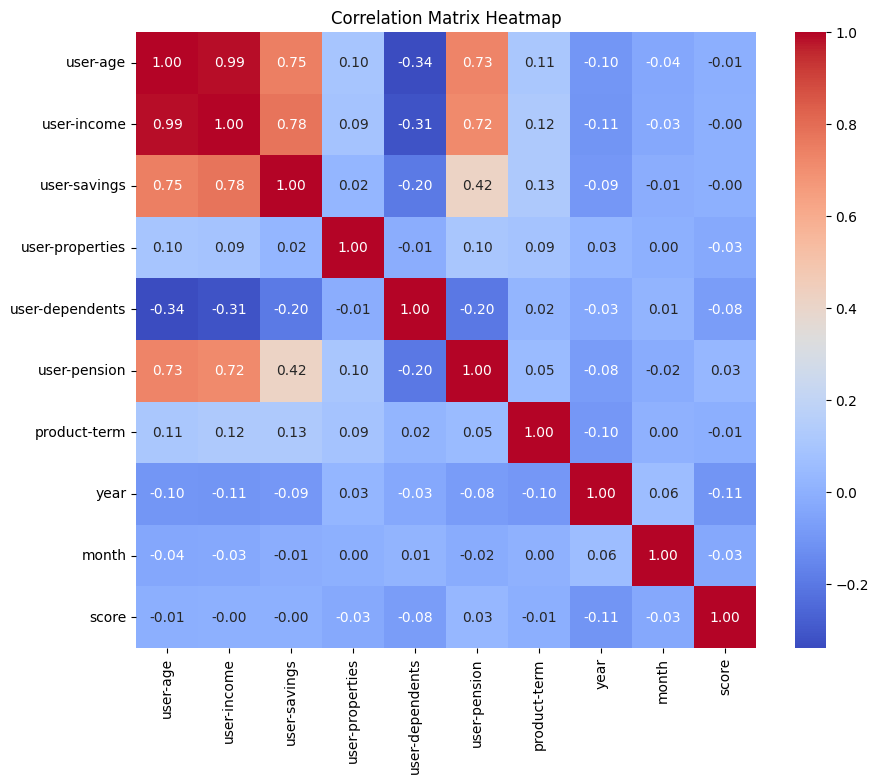

In [63]:
# Menghitung matriks korelasi
correlation_matrix = datasetc.corr()

# Plot heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user-id            304 non-null    object 
 1   user-age           304 non-null    int64  
 2   user-gender        304 non-null    object 
 3   user-nationality   304 non-null    object 
 4   user-knowledge     304 non-null    object 
 5   user-loyalty       304 non-null    object 
 6   user-loan          304 non-null    object 
 7   user-income        304 non-null    int64  
 8   user-savings       304 non-null    int64  
 9   user-properties    304 non-null    int64  
 10  user-riskAversion  304 non-null    object 
 11  user-marital       304 non-null    object 
 12  user-dependents    304 non-null    int64  
 13  user-pension       304 non-null    int64  
 14  product-type       304 non-null    object 
 15  product-risk       304 non-null    object 
 16  product-term       304 non

In [67]:
# Identifikasi data dan label
X = dataset.iloc[:, [1, 7]].values #fitur
y = LabelEncoder().fit_transform(dataset.iloc[:, 17].values)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

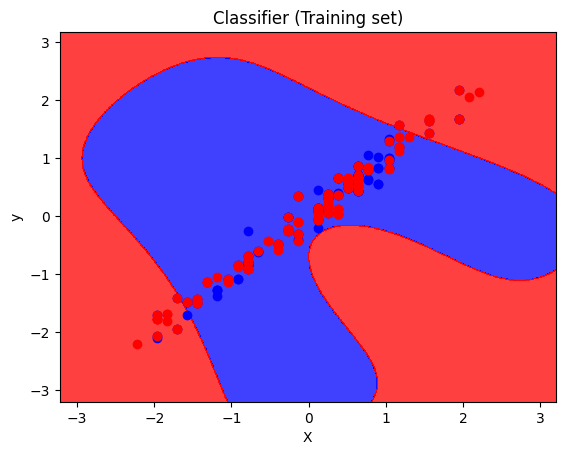

In [68]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Membuat meshgrid untuk plot pada decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)

Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('blue', 'red')))

# Limit plot ke dalamam range data
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('blue', 'red'))(i), label=j)

plt.title('Classifier (Training set)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Regresi

In [70]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy import stats

In [73]:
dataset = pd.read_csv('dataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user-id            304 non-null    object 
 1   user-age           304 non-null    int64  
 2   user-gender        304 non-null    object 
 3   user-nationality   304 non-null    object 
 4   user-knowledge     304 non-null    object 
 5   user-loyalty       304 non-null    object 
 6   user-loan          304 non-null    object 
 7   user-income        304 non-null    int64  
 8   user-savings       304 non-null    int64  
 9   user-properties    304 non-null    int64  
 10  user-riskAversion  304 non-null    object 
 11  user-marital       304 non-null    object 
 12  user-dependents    304 non-null    int64  
 13  user-pension       304 non-null    int64  
 14  product-type       304 non-null    object 
 15  product-risk       304 non-null    object 
 16  product-term       304 non

In [74]:
# Split data menjadi features (X) dan target variable (y)
X = dataset.iloc[:, [1]].values
y = dataset.iloc[:, 7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Regression model to the dataset
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

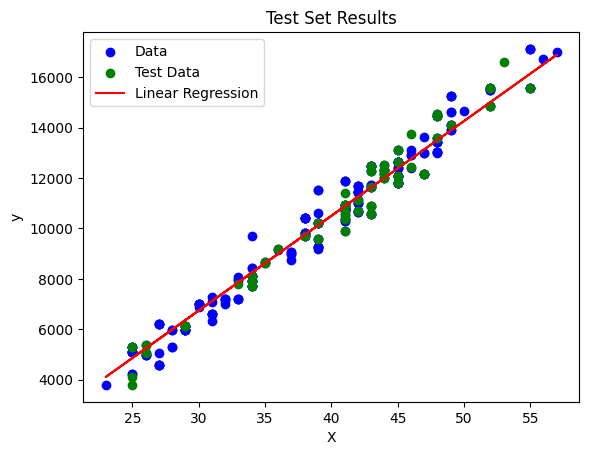

In [75]:
# Visualisasi model regresi linear sederhana
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Linear Regression')
plt.title('Test Set Results')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()